# Example: Combining Technical Repeats into Single Data object

You can now store multiple technical repeats into a single data object.

> **Note**:
> You can combine any two hdf5 files into technical repeats so long as their base acquisition parameters are the same.
> In this example we will use 4 different files, which are not actually technical repeats.
> This is for demonstration purposes, in general, you should only combine files that are actually acquired with the same sample and measuremtn parameters.

So first let's import FRETBursts

In [1]:
from fretbursts import *
sns = init_notebook(apionly=True)

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.
--------------------------------------------------------------
 You are running FRETBursts (version 0.7+46.ge31fadb.dirty).

 If you use this software please cite the following paper:

   FRETBursts: An Open Source Toolkit for Analysis of Freely-Diffusing Single-Molecule FRET
   Ingargiola et al. (2016). http://dx.doi.org/10.1371/journal.pone.0160716 

--------------------------------------------------------------


Now we download the files:

In [2]:
urls = ['https://zenodo.org/record/5902313/files/HP3_TE150_SPC630.hdf5',
        'https://zenodo.org/record/5902313/files/HP3_TE200_SPC630.hdf5',
        'https://zenodo.org/record/5902313/files/HP3_TE250_SPC630.hdf5',
        'https://zenodo.org/record/5902313/files/HP3_TE300_SPC630.hdf5']
for url in urls:
    download_file(url, save_dir='./data')

URL:  https://zenodo.org/record/5902313/files/HP3_TE150_SPC630.hdf5
File: HP3_TE150_SPC630.hdf5
 
File already on disk: /home/paul/Disk/Python/OpenSMFS/FRETBursts_notebooks/notebooks/data/HP3_TE150_SPC630.hdf5 
Delete it to re-download.
URL:  https://zenodo.org/record/5902313/files/HP3_TE200_SPC630.hdf5
File: HP3_TE200_SPC630.hdf5
 
File already on disk: /home/paul/Disk/Python/OpenSMFS/FRETBursts_notebooks/notebooks/data/HP3_TE200_SPC630.hdf5 
Delete it to re-download.
URL:  https://zenodo.org/record/5902313/files/HP3_TE250_SPC630.hdf5
File: HP3_TE250_SPC630.hdf5
 
File already on disk: /home/paul/Disk/Python/OpenSMFS/FRETBursts_notebooks/notebooks/data/HP3_TE250_SPC630.hdf5 
Delete it to re-download.
URL:  https://zenodo.org/record/5902313/files/HP3_TE300_SPC630.hdf5
File: HP3_TE300_SPC630.hdf5
 
File already on disk: /home/paul/Disk/Python/OpenSMFS/FRETBursts_notebooks/notebooks/data/HP3_TE300_SPC630.hdf5 
Delete it to re-download.


## Loading muliple photon-HDF5 files

To load mutliple files into a single data object (as technical repeats), simple provide the filenames as a list to `loader.photon_hdf5()`.

In [3]:
filenames = ["data/HP3_TE150_SPC630.hdf5", 
             "data/HP3_TE200_SPC630.hdf5", 
             "data/HP3_TE250_SPC630.hdf5", 
             "data/HP3_TE300_SPC630.hdf5"]
d = loader.photon_hdf5(filenames)

Now the rest of the analysis can proceed, what you do to one technical repeat, you do to the other.

In [4]:
loader.alex_apply_period(d)
d.calc_bg(bg.exp_fit, time_s=1000, tail_min_us=(800, 4000, 1500, 1000, 3000))
d.burst_search(L=10, m=10, F=6)
ds = d.select_bursts(select_bursts.size, add_naa=True, th1=30)

# Total photons (after ALEX selection):    42,952,084
#  D  photons in D+A excitation periods:   20,355,394
#  A  photons in D+A excitation periods:   22,596,690
# D+A photons in  D  excitation period:    26,137,425
# D+A photons in  A  excitation period:    16,814,659

 - Calculating BG rates ... get bg th arrays
Channel 0
Channel 1
Channel 2
Channel 3
[DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A]


The technical repeats are stored like separate spots in a multi-spot experiment, so now if you want to look at the E-values of a given repeat, it looks like `d.E[i]` where `i` is the index of the repeat in the data, as you supplied it to `loader.photon_hdf5`

In [5]:
ds.E

[array([ 0.63013166,  1.08016265, -0.46741336, ...,  1.84671817,
         0.50025412,  0.51366081]),
 array([ 0.60004655, -0.14250313,  0.27688086, ...,  0.10860017,
         0.87738934,  0.21554074]),
 array([51.37190963,  0.67815965,  0.9915698 , ...,  0.43502498,
         0.4441083 ,  1.34869422]),
 array([-0.05465742,  0.0269673 ,  0.14303468, ...,  0.12261628,
         0.18591468, -0.00293368])]

When you plot with `dplot()` the default will be to display each separately, in a 8-channel plot

array([[<AxesSubplot:title={'center':'[1], T=1593μs, #bu=9177'}, ylabel='S'>,
        <AxesSubplot:title={'center':'[2], T=1035μs, #bu=17334'}>],
       [<AxesSubplot:title={'center':'[3], T=1209μs, #bu=28747'}, ylabel='S'>,
        <AxesSubplot:title={'center':'[4], T=1147μs, #bu=24255'}>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

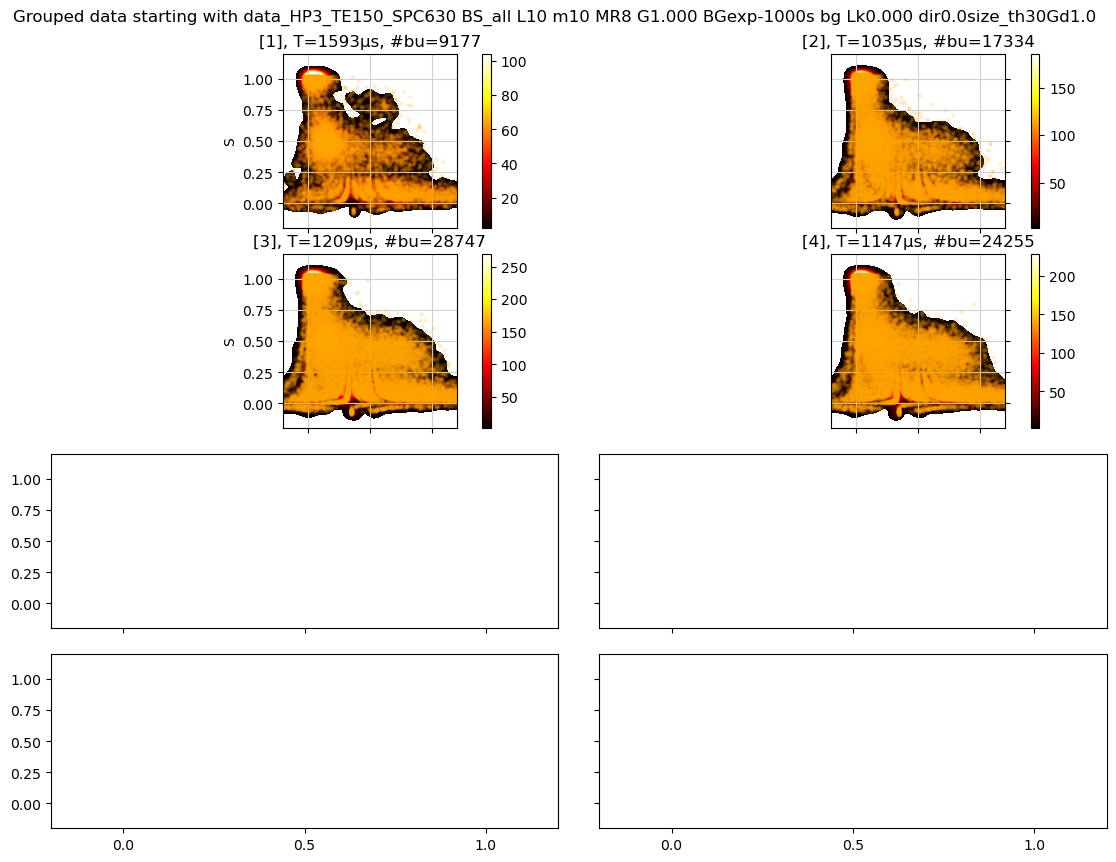

In [6]:
dplot(ds, hist2d_alex)

If you want to plot the combined results, just add the keyword argument `i=None`

<AxesSubplot:title={'center':'Grouped data starting with data_HP3_TE150_SPC630, T=1593μs, #bu=9177'}, xlabel='E', ylabel='S'>

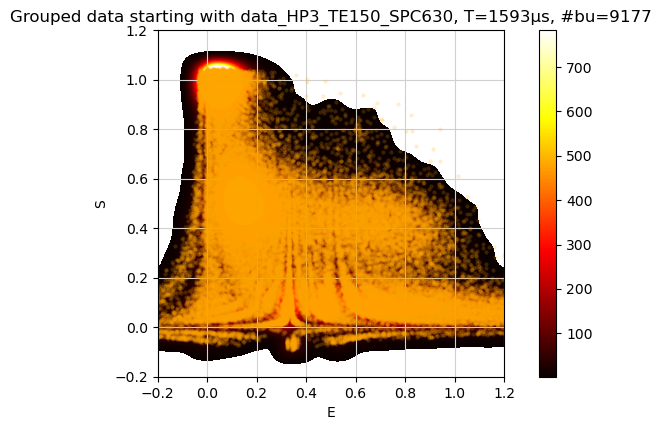

In [7]:
dplot(ds, hist2d_alex, i=None)

The fitter objects also now fit not just individual repeats, but the entire concatenated set:

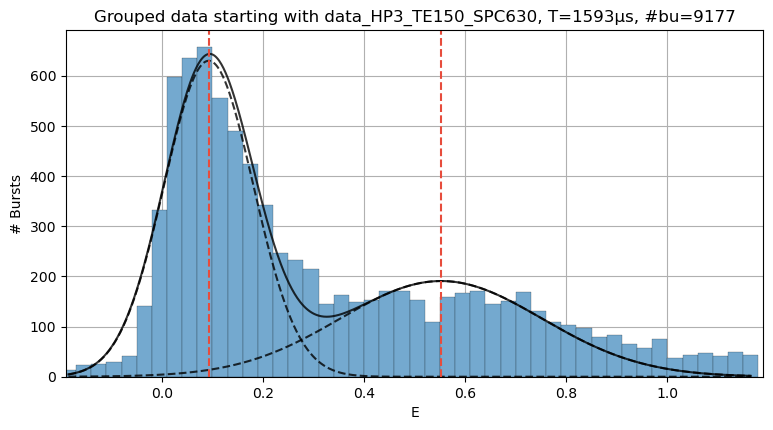

In [8]:
E_fitter = bext.bursts_fitter(ds, 'E', binwidth=0.03)
model = mfit.factory_two_gaussians()
E_fitter.fit_histogram(model=model, pdf=False, method='leastsq')
dplot(ds, hist_fret, show_model=True, pdf=False, i=0);

Finally, in the fitter object, new attributes have been added, basically, if there is a per-channel parameter, then the same name with `_tot` added to the end will contain the summed counts, pdf, or fitting object.

In [9]:
E_fitter.fit_res_tot